# Lab 3: Feature Selection

In this lab we read up the prepared data from Lab 1 and do some simple feature selection in preparation for applying machine learning models

#### Libraries used in this lab:
[pandas docs](https://pandas.pydata.org/pandas-docs/stable/)

[seaborn docs](https://seaborn.pydata.org/)

[matplotlib docs](https://matplotlib.org/contents.html)

[numpy docs](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html)

[scikit-learn docs](https://scikit-learn.org/stable/documentation.html)

In [1]:
# import python libraries we'll need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

In [2]:
# read in data prepared from lab 1, note we have headers now!
data = pd.read_csv("data_sets/lab_3_data.csv")
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Feature Selection: remove redundant features
Goal is to keep features that are both discrimitive between target categories and are unique in their relationship to the target variable. 

First we'll consider uniqueness of features. Any feature that has a strong correlation with another feature can be eliminated as it's discrimitive power is inherent within another feature. We also want to remove collinearity within the dataset as collinearity between features fails the assumption of Logistic Regression which assumes all features are independent. We'll explore the data looking for features with strong correlations so we can trim down the number of features we are considering. 

In [3]:
# filter for just mean features
mean_cols = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave_points_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
]

mean_cols.append('diagnosis')
mean_data = data[mean_cols]

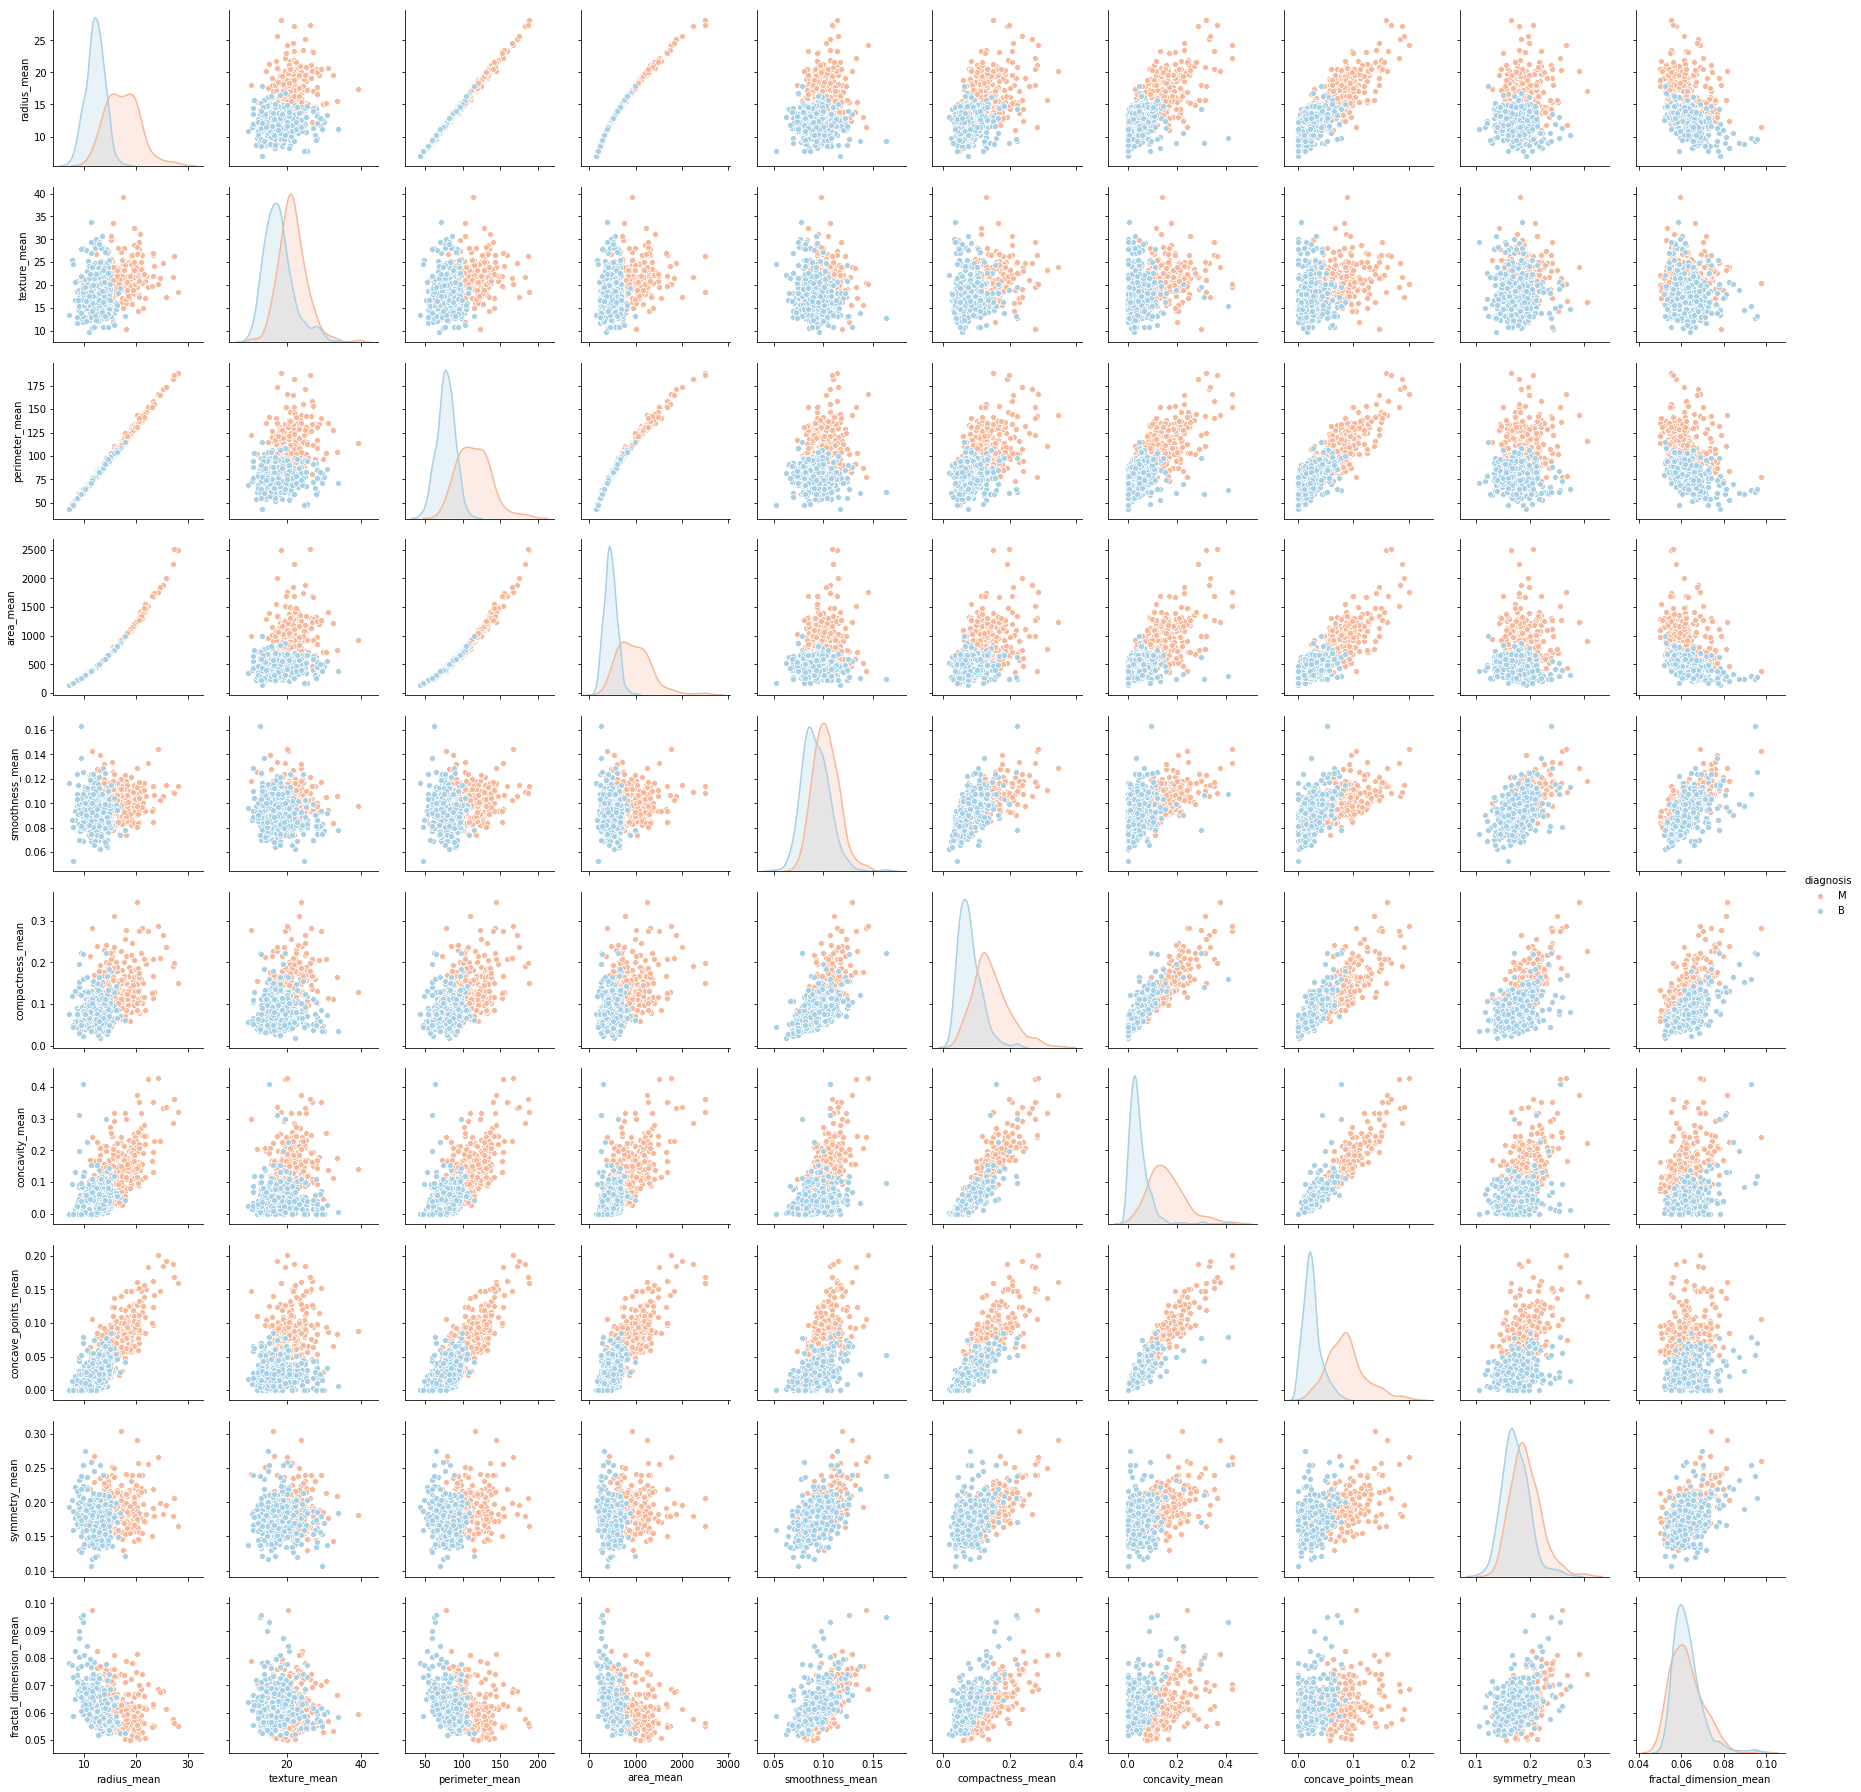

In [4]:
# create correlation plot of mean features
sns.pairplot(data=mean_data, hue='diagnosis', palette='RdBu')

We can see that radius, perimiter, area all have strong linear relationships to each other. This makes sense as all three are computing the same thing, the physical size of the tumor. As they are so similar we only need to one to represent how size relates to tumor malignancy in future modeling work. We'll choose radius.

There is also strong linear relatioship between concavity, concave_points and compactness. As they are so similar we only need to consider one for modeling. We'll choose compactness as that's a term we can easily understand. 

Going forward we'll consider featuers: radius, texture, smoothness, compactness, symmetry, and fractal)dimension

## Feature Selection: remove redundant measure types

Now that we've cleaned up redundant features we'll next focus on redundant measurement types. We'll again consider level correlation but this time using a heat map.

In [5]:
# filter for sub-sample of features across measurement types: mean, standard_error, worst
measurement_types = [
    'mean',
    'standard_error',
    'worst'
]

sample_cols = [
    'radius',
    'smoothness',
    'fractal_dimension'
]

correlation_cols = []
correlation_cols.append('diagnosis')
for measurement in measurement_types:
    for col in sample_cols:
        correlation_cols.append('_'.join([col, measurement])) 
correlation_data = data[correlation_cols]

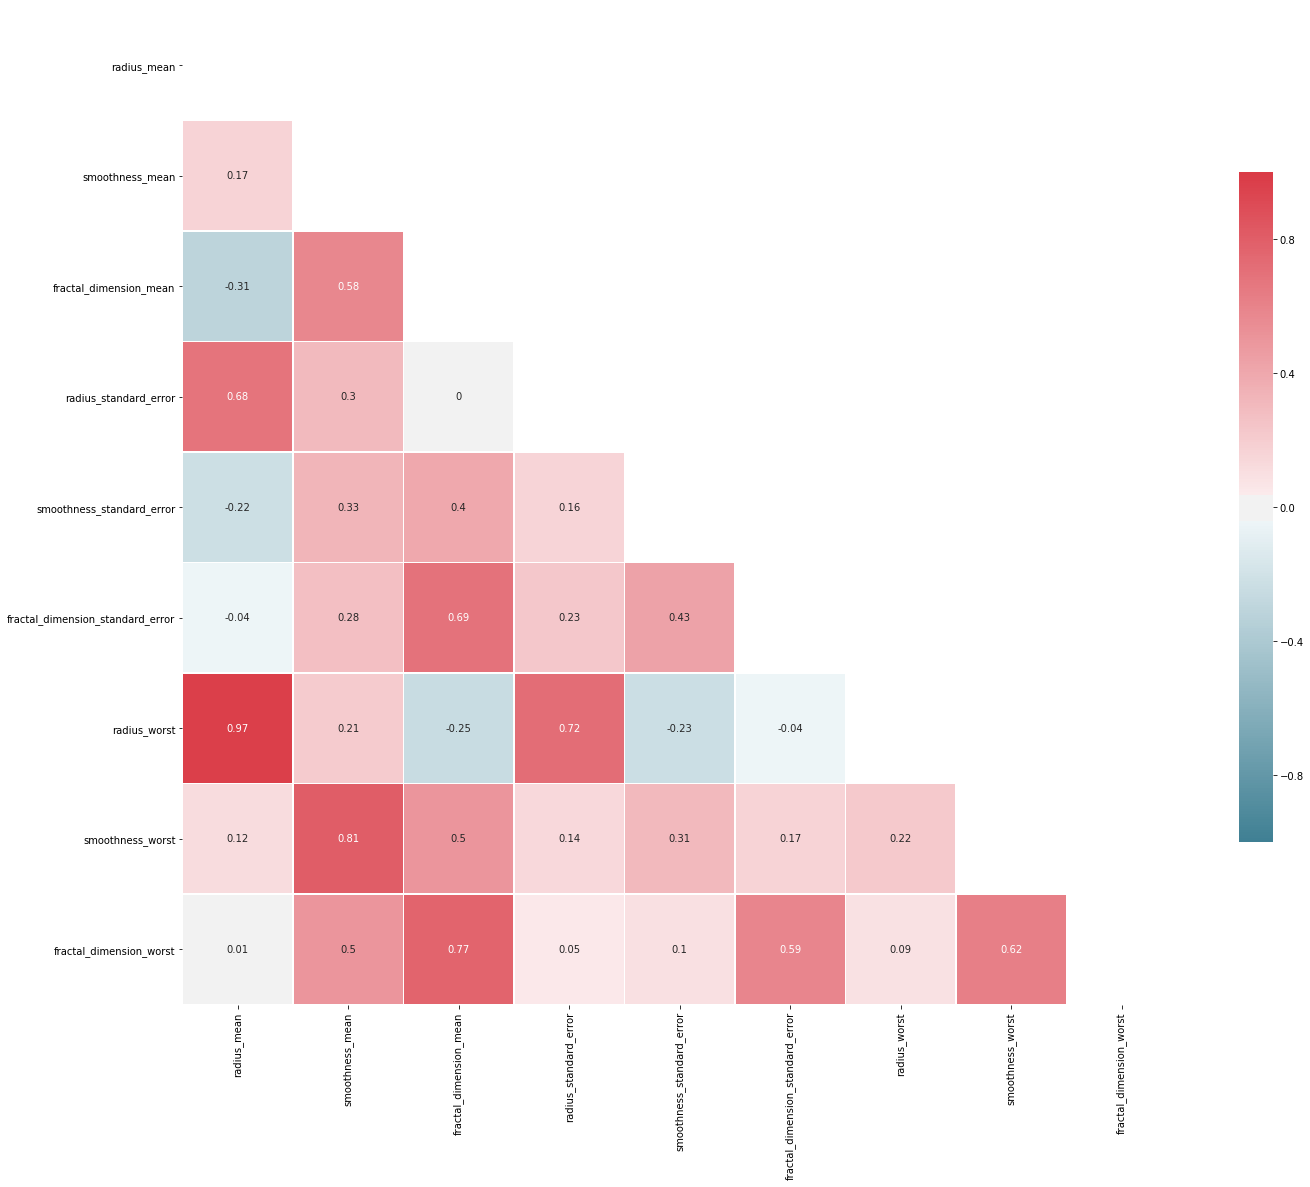

In [6]:
# Generate and visualize the correlation matrix
corr = correlation_data.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

The highest correlations are seen between measurement types mean and worst (0.7 and up). This makes sense as worst is the mean of the highest three measurements. The two measurements may be different but have the same underlying calculation. We only need one going forward, we'll stick with mean. 

## Feature Selection: remove non-discrimitive features
We want to consider features that have potential for helping us distinguish between the two classes, Benign and Malignant. In this section we'll visualize the remaining features by tumor type with the goal to remove features that are high overlap between tumor types. 


In [7]:
# create a plot function that we can reuse
def feature_box_plot(columns, dataframe):
    # transform data so we can plot features side by side
    melted = pd.melt(data, id_vars=['id', 'diagnosis'], value_vars=columns)
    # plot features seperated by diagnosis
    g =sns.boxplot(x="variable", y="value", hue="diagnosis", data=melted)
    # angle x axis labels to 45 degrees for readability
    g.set_xticklabels(g.get_xticklabels(), rotation=45)

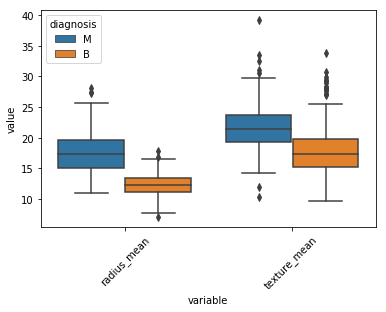

In [8]:
# two features have much larger scales than the other four, plotting them seperatly to aid in visualization
select_cols = [
    'radius_mean',
    'texture_mean',
]
feature_box_plot(select_cols, data)

## Excercise 1: Create box plot for remaining features
Using the helper function `feature_box_plot` create a box plot for features `smoothness_mean`, `compactness_mean`, `symmetry_mean`, and `fractal_dimension_mean`

In [ ]:
# complete the follow code snippet with the instructions above
feature_box_plot() # hint: create a new feature column set for argument 1

If you were able to create the box plot above you'll notice that the feature fractal_dimiesion_mean has overlapping ranges for both tumor type categories. Let's see if this pattern is also true when plotting fractal_dimension_stadard_error

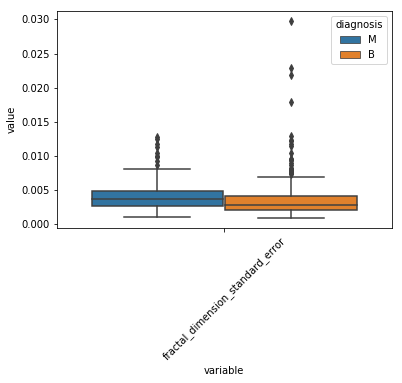

In [9]:
# reshape data from wide to long to in order to visualize select variables side by side
select_cols = [
    'fractal_dimension_standard_error',
]
feature_box_plot(select_cols, data)

Overlapping distrubtion pattern holds for fractal_dimesion_standard_error. This simple visualization indicates that fractal_dimension may not be very helpful feature for modeling tumor type. We'll remove it from the data set (but can add it back later if we wish).

## Feature Selection: finalizing feature set, splitting into Test and Train datasets

After considering features with different diagnostics we've settled on five features each represented by two measurement types. 

After filtering we'll split our dataset into a train dataset and a test dataset. We want to ensure that we have proportionally the same ration of benign to malignant tumor types in each dataset. 



In [4]:
# select final columns from data
select_cols = [
    'radius',
    'texture',
    'smoothness',
    'compactness',
    'symmetry',
]

select_measurement_types = [
    'mean',
    'standard_error'
]

final_cols = []
final_cols.append('diagnosis')
for measurement in select_measurement_types:
    for col in select_cols:
        final_cols.append('_'.join([col, measurement])) 
final_features = data[final_cols]

# encode target labels from M/B to 1/0 (helpful for downstream model evaluation)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

copy_for_recode = final_features.copy()
le.fit(copy_for_recode['diagnosis'])
copy_for_recode['diagnosis_code'] = le.transform(copy_for_recode['diagnosis']) 
final_df = copy_for_recode.copy()

#split in to train and test sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(final_df)

In [5]:
# compare test and train datasets by diangosis breakdown
def compare_test_train(train_df, test_df):
    train_benign, train_malignant = train_df['diagnosis'].value_counts(normalize=True)
    test_benign, test_malignant = test_df['diagnosis'].value_counts(normalize=True)
    percentage_diff_benign = abs(train_benign - test_benign) * 100
    rounded = round(percentage_diff_benign, 2)
    print('difference between train and test set for percent benign tumors: {}%'.format(rounded))
    
compare_test_train(train_df, test_df)

difference between train and test set for percent benign tumors: 2.13%


## Exercise 2: Split data into a training set and a test set keeping proportion of tumor type consistent between sets
A test set should be representative of the training set to ensure we are evaluating the model on a true representation of the population. 
Use the `train_test_split()` [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data into two sets using the `stratify` term. You can also set the `random_state` and set the `test_size`.
Once you've split the data into new train test sets, use the `compare_test_train` helper function to evaluate whether the two sets have proportionally the same amount of benign tumors.

In [ ]:
# the following functions are missing arguments, please fill them in 
train_df, test_df = train_test_split()
compare_test_train() 

In [6]:
# save files to `data_sets` folder
train_df.to_csv("data_sets/train.csv", index=False)
test_df.to_csv("data_sets/test.csv", index=False)